
Final Project : Credit Card Fraud Detection  
Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?fbclid=IwAR0cE44LnzPeueP1CDPSbOJvwizZIStTZTRFqBo12RAQ0Tdj3FXs0S1v3BA  
Video: https://drive.google.com/drive/folders/1TdS945_XUEYXg8xUf4nzijxEzdtAAZIk?usp=share_link  
 
 Name: Nishant Shrestha and Tung Tran  
 Class: CSCI 349 SP 2023  
 Instructor: Dr. Brian King  

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, f1_score,roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [33]:
df_fraud = pd.read_csv('creditcard.csv')
df_fraud.info()
%config Completer.use_jedi = False
df_fraud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Variable description
**Time** contains the seconds elapsed between each transaction and the first transaction in the dataset.    
**Amount** is the credit transaction Amount.    
**V1-V28** undisclosed variables transformed using PCA.  
  
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. More so, a peak at the original dataset shows us that most of the variables have more than 8 significant figures. Thus, we also choose not to downcast our data. Only the **Time** vaiable is downcasted. This variable represent the time elapsed after the first transaction in the dataset. We choose to ignore this variable in most of our models as we believe this variable is backward looking and predictions made of the future wouldn't be influenced by the realization we have. 


# Setting up variables to the correct types

In [34]:
df_fraud['Time'] = df_fraud.Time.astype(int)
df_fraud['Time'] = pd.to_numeric(arg =df_fraud['Time'], downcast = 'integer' )
df_fraud.Class = pd.Categorical(df_fraud.Class)
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  int32   
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [20]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


**NOTE:** Since most of the models we will be using with this dataset are influenced by distance measures to some extent, we have standardized all of our variables (code is shown later duting modeling)

In [21]:
df_fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**NOTE:** Our target vaiables is binary in nature with 1 representing fraud and vice-versa. We can clearly see that the dataset is highly unbalanced with only 492 fraud activity. As a result, any simple performance metric, such as the accuracy of a model, won't be a good indicator of how our model will perform. We should note that metrics that prioritize minimizing false positives are highly recommended for predictive models where the cost of false positives is high, including credit card fraud detection models. Such metrics include precision, f1, and the AUC. Moving on, we will keep this in mind.

## Exploratory Data Analysis

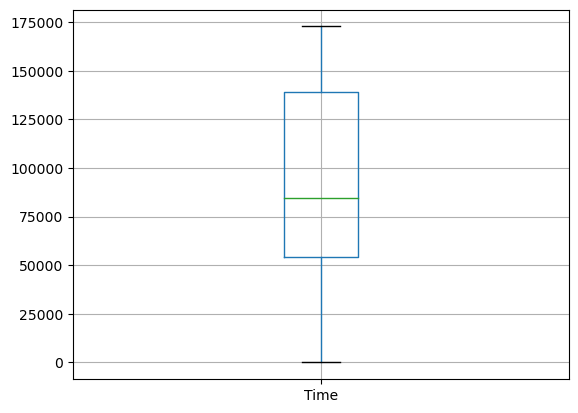

In [22]:
df_fraud.boxplot(column='Time')
plt.show()

The **time** variable looks to symmetrically distrbuted and no odd behaviors seem to be observed

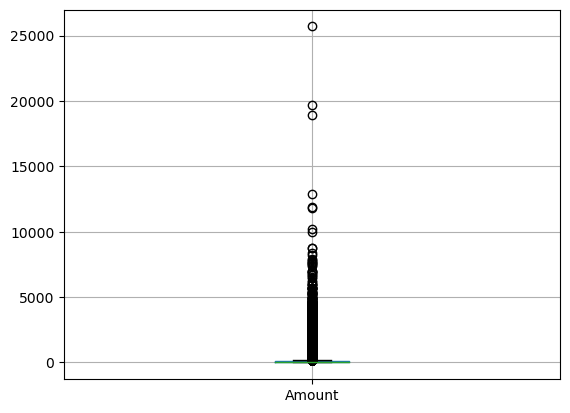

In [23]:
df_fraud.boxplot(column='Amount')
plt.show()

There seems to be a substantial amount of outliers for this variable and the data seems positively skewed.One quick hypothesis to check is if some outliers represent fradulent activity. Herem right outlier is aproximately equal to 110. 

In [24]:
outlier_amount = df_fraud[df_fraud.Amount >= 110]
outlier_amount.Class.value_counts()

0    52649
1      118
Name: Class, dtype: int64

In [25]:
round((118)/(52649+118)*100,3)

0.224

About 0.224% of the data twhere the transaction amount is a positive outlier is fradulent, the original dataset only had 0.172% fradulent transactions of the total dataset. 

In [26]:
round((0.224-0.172)*100/0.172,3)

30.233

This is a 30 percent increase in transaction fraud. As such, the **Amount** variable might play a crucial role in detecting fraud. We will explore this relation later on.

Although, we don't require to visualize the PCA transformed columns, since we can't extract any meaningful information from them, we can check if they have been properly transformed by checking the correlation between the variables. 

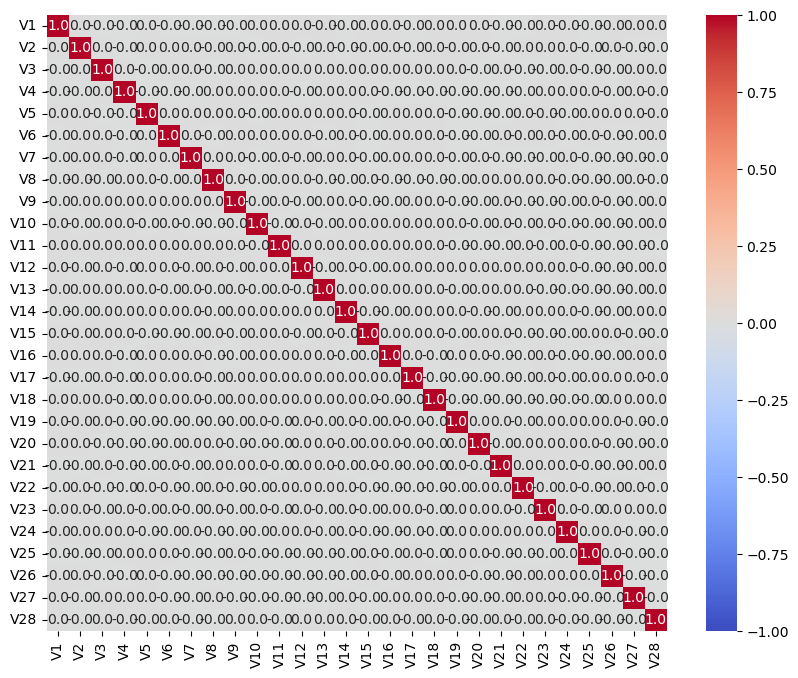

In [27]:
# correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df_fraud.iloc[:,1:29].corr(),
            center=0, vmin=-1, vmax=1, cmap="coolwarm",
            annot=True, fmt=".1f")
plt.show()

**NOTE:** Looking at the correlations between all the PCA transformed variables, we can confirm that these variables have been properly PCA transformed, since none of them are coorelated to each other

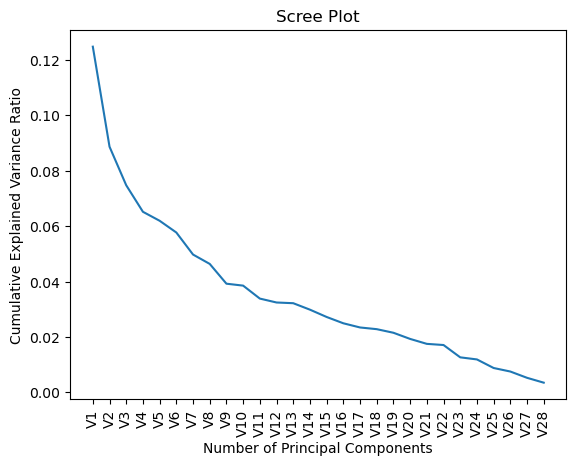

In [28]:
# generating a scree plot for the PCA transformed columns
variance = np.var(df_fraud.iloc[:,1:29], axis=0)
explained_variance_ratio = variance / np.sum(variance)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(explained_variance_ratio)
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.xticks(rotation=90)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Data Pre-processing

In [35]:
# Note, we are not using the time variable for the majority of our models. 
y = df_fraud.Class #traget class which is binary
X = df_fraud.iloc[:,1:30] # v1 till amount
X,y = shuffle(X,y, random_state=0)

# standardizing the independent variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index = X.index)

# setting up the training and testing variables, we use 70% of the data for training and the rest for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

X_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,6.486537e-19,-1.394605e-17,-1.377142e-17,7.883637e-18,-8.781773e-18,7.434569e-18,9.505271e-18,-2.494822e-19,2.494822e-19,6.611278e-18,...,-6.461589e-18,1.546790e-18,3.143476e-18,5.363867e-18,1.147618e-17,-5.139333e-18,1.207494e-17,2.619563e-18,-5.089437e-18,3.013745e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


**NOTE:** We can clearly see that all of our variables have been stanardized and the mean is nearly 0 and the standard deviation is nearly 1.

## Modeling

# 1. Decision Tree

A **gridsearch algorithm** was run to optimize f1-score. The following parameters were used for the search:  
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

The following results were obtained:  
best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}  
the following f1_score was obtained: 0.9157052515826072

**Note: Please, look at Appendix 1 file to check out the test results.

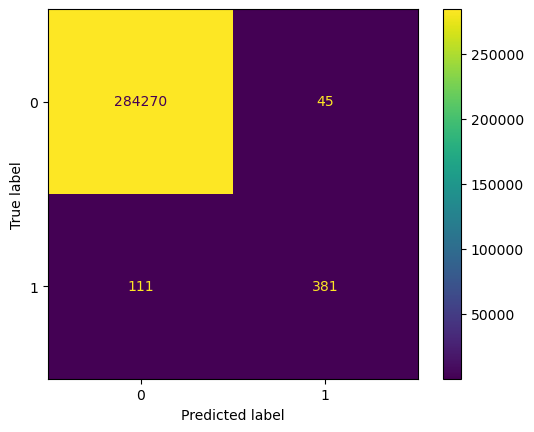

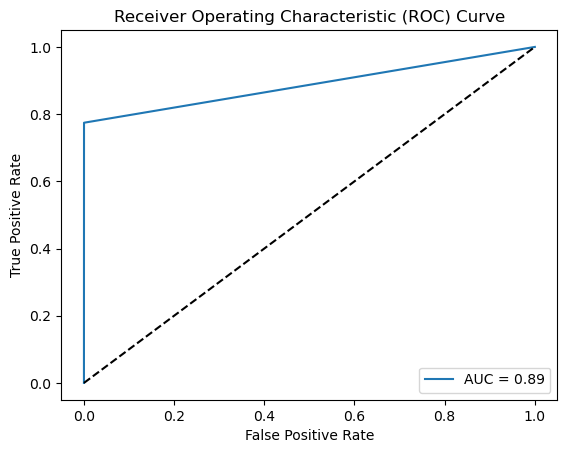

f1-score:  0.8300653594771242


In [30]:

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=5)



y_pred = cross_val_predict(clf, X_scaled, y, cv=5)

# generate confusion matrix
ConfusionMatrixDisplay.from_predictions(y,y_pred)
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_pred)

# compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('f1-score: ', f1_score(y, y_pred))

**Decision Tree Analysis:** Although we don't obtain a 92 percent f1-score, our model does decently well with an f1-score of 83 percent. We hypothesize, we don't recieve consistent results because of failiing to set a random seed. Moving on, we will fix a random seed for our models. Also, the AUC curve, although not applicable with decision trees, also looks decent. However,we see an issue here. 112 fraud transactions are being falsely labeled as legittimate transactions. This is very costly in the real world. We will further explore with more robust classifiers.

# 2. Random Forest

Again, we run a grid search using random forests and use the following paramters:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

The results we recieve are as follows and the test runs are in Appendix1:
Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score:  0.9257026205508934




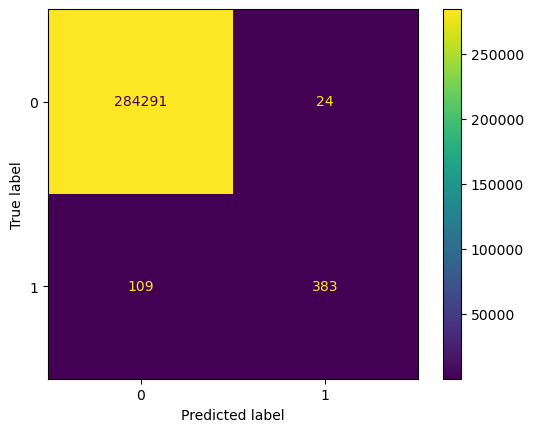

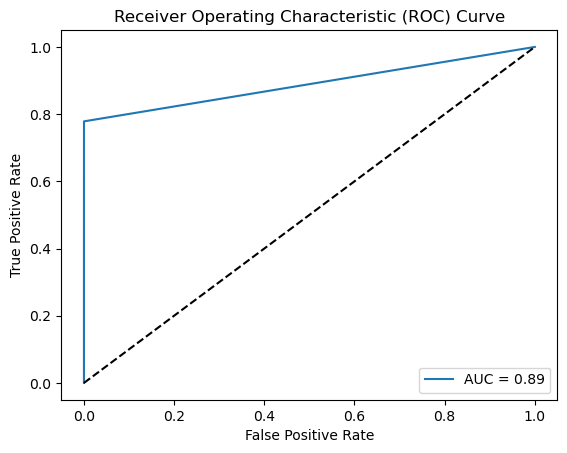

f1-score:  0.8520578420467186


In [37]:
clf = RandomForestClassifier(n_estimators = 50, random_state=42,
                             max_depth=None,
                             min_samples_split=5,
                             min_samples_leaf=1)

y_pred = cross_val_predict(clf, X_scaled, y, cv=2)

# generate confusion matrix
ConfusionMatrixDisplay.from_predictions(y,y_pred)
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_pred)

# compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('f1-score: ', f1_score(y, y_pred))



**Random Forest Analysis:** Surprisingly, we were still not able to achieve the same f1-score as what the gridsearch algorithm returned. However, we are again observing a decent f1-score of around 85 percent. Our AUC is also comparable to that of the decision tree. However, we still have quite a few false negatives, which is concering. Using a random forest we were only able to improve misclassification of fraud transactions by a mere 2 transactions (109 as compared to 111 from the decision tree algorithm). As such, we look at more algorithms to see if we can retrieve better results.

# 3. Neural Network

We were unable to use a gridsearch due to the limitations of the Keras Wrapper. We tried various ways including defining our own custom scoring method, using basic metrics including precision, recall, and accuracy, yet the algorithm couldn't successfully run. The eror prompts we recieved are in Appendix1. As a result, we had to manually try out different hyperparameters and were able to retrieve the follwoing results. 

2023-05-02 13:03:39.547702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-02 13:03:39.548221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/remote/lib
2023-05-02 13:03:39.575431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/remote/lib
2023-05-02 13:03:39.597403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/rem

Model: "credit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 300)               9000      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 99,601
Trainable params: 99,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
399/399 [==============================] - 34s 76ms/step - loss: 0.0130 - auc: 0.8636 - precision: 0.3185 - recall: 0.6142 - val_loss: 0.0035 - val_auc: 0.9346 - val_preci

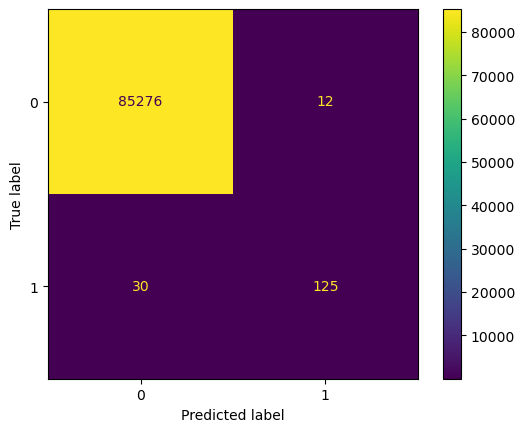

f-1 score:  0.8561643835616439


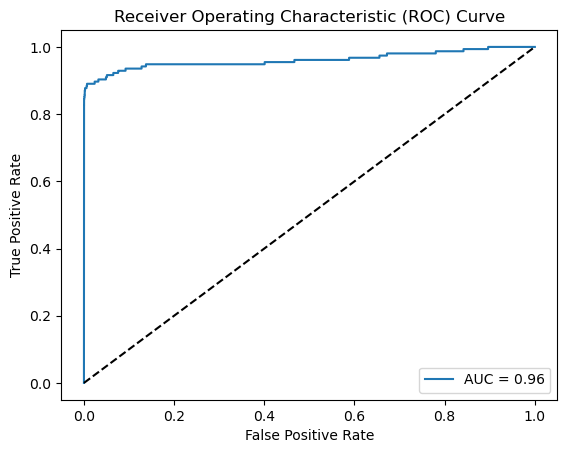

In [16]:
# A neural network implementation
num_hidden = 300
inputs = keras.Input(shape=(X_scaled.columns.size,))
layer1 = Dense(num_hidden, activation = 'relu')(inputs)
layer2 = Dense(num_hidden, activation = 'relu')(layer1)
outputs = Dense(1,activation="sigmoid")(layer2)
model = keras.Model(inputs=inputs, outputs=outputs, name="credit_model")
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['AUC', 'Precision', 'Recall'])

history = model.fit(X_train, y_train, epochs=10, batch_size=500, validation_data=(X_test, y_test))

y_pred  = history.model.predict(X_test)

y_pred_class = np.round(y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
plt.show()

print('f-1 score: ',f1_score(y_test, y_pred_class))

# compute the false positive rate, true positive rate, and corresponding thresholds

# use probailities instead of the actual prediction
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Neural Network Analyis:** The neural network model also does decently well with an f-1 score of 86 percent, and AUC area of 96 percent. However, we still observe a few false negative value which are very costly in our context. As such, we will now look for a different metric to see if we can minimize false negatives.

####
### ***We choose F2 score as the objective for the following reason***:

The task is to find fraud transaction so we need to prioritize positive class. So the F-measures scoring family (which are harmonic means of precision and recall) is chosen to optimize both precision and recall.  
Furthermore, False Negatives (FNs), or transactions deemed to be not fraud turn out to be fraud, would cause total loss of money for a customer. So we think FNs are more costly than false positives.   
**Thus we chose F2 score as the objective we're optimizing for.**  

To demonstrate the effect of F2 score in this case, we compare it to F1 score, which is used when false predictions are equally costly:  
$$ F1 = 2 \frac{\text{(precision)}\text{(recall)}}{\text{(precision)} + \text{(recall)}}  = 2 \frac{1}{\frac{1}{\text{(recall)}} + \frac{1}{\text{(precision)}}}$$  
so (precision) and (recall) contribute equally to $F1$ score, however,      
$$ F2 = 5 \frac{\text{(precision)}\text{(recall)}}{4\text{(precision)} + \text{(recall)}} = 5 \frac{1}{\frac{4}{\text{(recall)}} + \frac{1}{\text{(precision)}}}$$ 
where recall has higher impact on the overall $F2$ score, so FNs weigh more.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, precision_recall_curve, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


def auc_pr(clf, X_test, y_test):
    p, r, _ = precision_recall_curve(y_test, clf.predict(X_test))
    return auc(r, p)

def f2_score(clf, X_test, y_test):
    return fbeta_score(y_test, clf.predict(X_test), average='binary', beta=2)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [16]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=RANDOM_STATE)
X_res, y_res = sme.fit_resample(X_scaled, y)
X_res.shape, y_res.shape

((567733, 11), (567733,))

### 4. Linear Algorithms

Simple and fast, great baselines

#### Logistic Regression

In [17]:
param_grid = { 'class_weight' : [None],
               'C' : [0.5],
               'penalty' : ['l2']
             }

grid = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_logistic = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_logistic.best_score_}')
print('best parameters :', grid_result_logistic.best_params_)
# 0.912997078971884

best f2_score: 0.912997078971884
best parameters : {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}


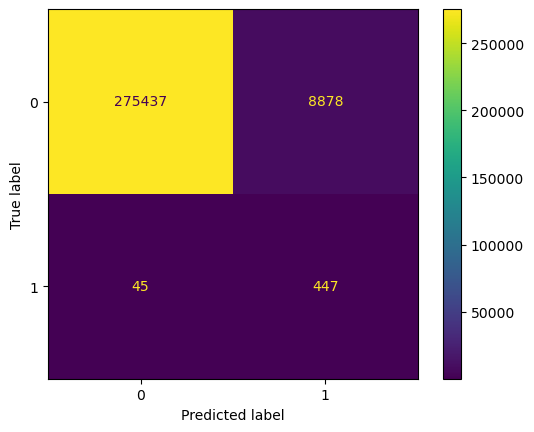

In [24]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    accuracy_score
)
ConfusionMatrixDisplay.from_predictions(y, grid_result_logistic.best_estimator_.predict(X_scaled))
plt.show()

**Logistic Regression Analysis**: 91.3\% seems to be a good performance for such a simple algorithm. However, the number of False Positives is a bit high. 

#### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

param_grid = { 'var_smoothing' : [1e-7],
             }

grid = GridSearchCV(GaussianNB(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_bayes = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_bayes.best_score_}')
print('best parameters :', grid_result_bayes.best_params_)

best f2_score: 0.776929103923513
best parameters : {'var_smoothing': 1e-07}


**Naive Bayes Analysis**: With 77-78% F2 score, Naive Bayes performs worse than Linear Regression. Thus is not chosen to be the baseline model

### 5. Non-linear Algorithms

### K-Nearest Neighbor

In [19]:
param_grid = { 'n_neighbors' : [3],
               'weights': ['distance']
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_kneighbors = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_kneighbors.best_score_}')
print('best parameters :', grid_result_kneighbors.best_params_)

best f2_score: 0.9999212209001609
best parameters : {'n_neighbors': 3, 'weights': 'distance'}


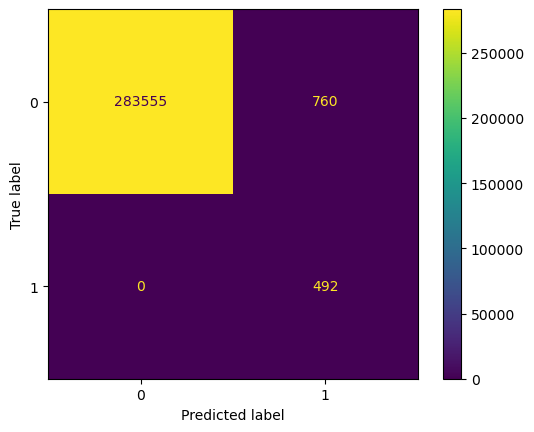

In [25]:
ConfusionMatrixDisplay.from_predictions(y, grid_result_kneighbors.best_estimator_.predict(X_scaled))
plt.show()